<a href="https://colab.research.google.com/github/AugustasStankunas/Iris_Species_Neural_Network/blob/main/Iris_species_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [116]:
class Model(nn.Module):
  def __init__(self, in_features = 4, h1 = 8, h2 = 9, out_features = 3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [117]:
model = Model()
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [118]:
#change species from strings to integers
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)

In [119]:
X = my_df.drop('species', axis=1)
y = my_df['species']

In [120]:
#convert to numpy arrays
X = X.values
y = y.values

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [123]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [124]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [125]:
#training
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train)
  #Measure loss
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')
  #Backpropagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.1560511589050293
Epoch: 10 and loss: 1.0143998861312866
Epoch: 20 and loss: 0.8618272542953491
Epoch: 30 and loss: 0.6019240617752075
Epoch: 40 and loss: 0.39995908737182617
Epoch: 50 and loss: 0.25033265352249146
Epoch: 60 and loss: 0.14631566405296326
Epoch: 70 and loss: 0.09516849368810654
Epoch: 80 and loss: 0.07294365763664246
Epoch: 90 and loss: 0.0626458153128624


Text(0.5, 0, 'epochs')

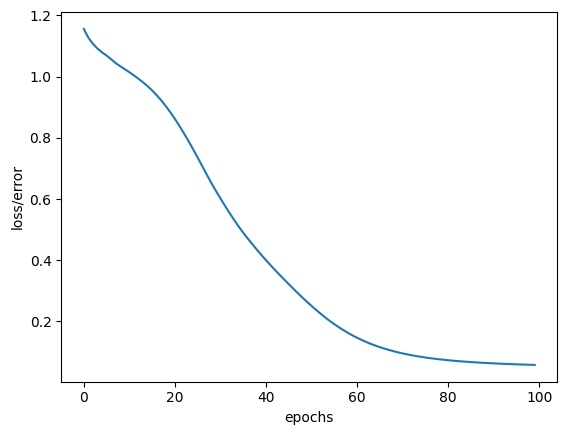

In [126]:
plt.plot(range(epochs), losses)
plt.ylabel('loss/error')
plt.xlabel('epochs')

In [127]:
#Evaluate
with torch.no_grad(): #turn off backpropagation
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

In [128]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)
    if y_val.argmax().item() == y_test[i]:
      correct += 1
    #y_val = y_val.tolist()
    #y_val = [round(num, 5) for num in y_val]
    #print(f'{i + 1}.) Prediction: {y_val.argmax()} \t {y_test[i]}')
print(f'{correct}/{len(X_test)} correct')

29/30 correct
